# 0. Preliminaries

In [1]:
# data import, feature generation, EDA
import pandas as pd

In [2]:
# import data
df_train = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/train.csv')
df_train_copy = df_train.copy()

df_test = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test.csv')
df_test_labels = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test_labels.csv')

# merge test set and test labels
df_test = pd.merge(df_test, df_test_labels)

# clean the test set to filter invalid label values (-1)
df_test_clean = df_test[df_test['toxic'] >= 0]

# 1. Feature Engineering

## i. Manual

In [3]:
# for creating indices, plots
import numpy as np

import string

In [4]:
%%time
df_train['count_char'] = df_train['comment_text'].str.len()
df_train['count_word'] = df_train['comment_text'].apply(lambda x: len(str(x).split()))
df_train['avg_word_len'] = df_train['comment_text'].str.split().apply(lambda x: np.mean(np.array([len(word) for word in x])))
df_train['count_line'] = df_train['comment_text'].apply(lambda x: len(str(x).splitlines()))
df_train['avg_line_len'] = df_train['comment_text'].apply(lambda x: np.mean(np.array([len(line) for line in str(x).splitlines()])))

df_train['count_word_unique'] = df_train['comment_text'].str.split().apply(lambda x: len(set(x)))
df_train['prop_word_unique'] = df_train['count_word_unique'] / df_train['count_word']

# # abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789
# df_train['count_word_alnum'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isalnum() for word in x])))
# df_train['prop_word_alnum'] = df_train['count_word_alnum'] / df_train['count_word']

# abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
df_train['count_word_alpha'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isalpha() for word in x])))
df_train['prop_word_alpha'] = df_train['count_word_alpha'] / df_train['count_word']

df_train['count_word_ascii'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isascii() for word in x])))
df_train['prop_word_ascii'] = df_train['count_word_ascii'] / df_train['count_word']

df_train['count_word_decimal'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isdecimal() for word in x])))
df_train['prop_word_decimal'] = df_train['count_word_decimal'] / df_train['count_word']

# 0123456789
df_train['count_word_digit'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isdigit() for word in x])))
df_train['prop_word_digit'] = df_train['count_word_digit'] / df_train['count_word']

df_train['count_word_lower'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.islower() for word in x])))
df_train['prop_word_lower'] = df_train['count_word_lower'] / df_train['count_word']

df_train['count_word_numeric'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isnumeric() for word in x])))
df_train['prop_word_numeric'] = df_train['count_word_numeric'] / df_train['count_word']

# 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c
df_train['count_word_printable'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isprintable() for word in x])))
df_train['prop_word_printable'] = df_train['count_word_printable'] / df_train['count_word']

df_train['count_word_space'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isspace() for word in x])))
df_train['prop_word_space'] = df_train['count_word_space'] / df_train['count_word']

df_train['count_word_title'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.istitle() for word in x])))
df_train['prop_word_title'] = df_train['count_word_title'] / df_train['count_word']

df_train['count_word_upper'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isupper() for word in x])))
df_train['prop_word_upper'] = df_train['count_word_upper'] / df_train['count_word']

# abcdefghijklmnopqrstuvwxyz
df_train['count_char_ascii_lowercase'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.ascii_lowercase]))
df_train['prop_char_ascii_lowercase'] = df_train['count_char_ascii_lowercase'] / df_train['count_char']

# ABCDEFGHIJKLMNOPQRSTUVWXYZ
df_train['count_char_ascii_uppercase'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.ascii_uppercase]))
df_train['prop_char_ascii_uppercase'] = df_train['count_char_ascii_uppercase'] / df_train['count_char']

# 0123456789
df_train['count_char_digits'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.digits]))
df_train['prop_char_digits'] = df_train['count_char_digits'] / df_train['count_char']

# 0123456789abcdefABCDEF
df_train['count_char_hexdigits'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.hexdigits]))
df_train['prop_char_hexdigits'] = df_train['count_char_hexdigits'] / df_train['count_char']

# 01234567
df_train['count_char_octdigits'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.octdigits]))
df_train['prop_char_octdigits'] = df_train['count_char_octdigits'] / df_train['count_char']

# !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
df_train['count_char_punctuation'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
df_train['prop_char_punctuation'] = df_train['count_char_punctuation'] / df_train['count_char']

# 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c
df_train['count_char_printable'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.printable]))
df_train['prop_char_printable'] = df_train['count_char_printable'] / df_train['count_char']

# 
df_train['count_char_whitespace'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.whitespace]))
df_train['prop_char_whitespace'] = df_train['count_char_whitespace'] / df_train['count_char']

Wall time: 6min 12s


## ii. spaCy (incomplete)

In [5]:
import spacy

In [6]:
nlp = spacy.load("en_core_web_sm")
# this step is slow
# df_train['doc'] = df_train['comment_text'].apply(nlp)

# df_train['doc'].apply(lambda x: x.text for token in x)

# 2. Exploratory Data Analysis

## i. Class Imbalance

Classes are imbalanced 10:1. Downsample the majority class.

In [7]:
df_train['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [8]:
# downsample the majority class

# count number of rows in each class
count_minor = df_train['toxic'].value_counts().min()
count_major = df_train['toxic'].value_counts().max()

# reproducible shuffled index
r = np.random.RandomState(1150)
indices = np.arange(count_major)
r.shuffle(indices)
downsamp_indices = indices[:count_minor]
excluded_indices = indices[count_minor:]

# subset classes
class_minor = df_train[df_train['toxic'] == 1]
class_major = df_train[df_train['toxic'] == 0].iloc[downsamp_indices]

# concatenate to class balanced dataframe
df_train_bal = pd.concat([class_minor, class_major]).sort_index()

## ii. Train / Test Split

In [12]:
# train test split
from sklearn.model_selection import train_test_split

In [13]:
# train/test split the data
Xy_train, Xy_test = train_test_split(df_train_bal, stratify=df_train_bal['toxic'], random_state=1115)

# add leftover train set rows to test set
Xy_test = pd.concat([df_train[df_train['toxic'] == 0].iloc[excluded_indices], Xy_test]).sort_index()

# final train/test sets
X_train, y_train = Xy_train['comment_text'], Xy_train['toxic']
X_test, y_test = Xy_test['comment_text'], Xy_test['toxic']

## iii. Descriptive Statistics

There are 159,571 comments in the data set.  
The training set is class-balanced with 22,941 rows. (The original data set was class-imbalanced 10:1 nontoxic:toxic.)  
Only looking at the training set, the length of comments ranges from 8 to 5000 characters.

In [9]:
# number of comments in data
print(f'number of documents in data set: {df_train.shape[0]}\n')

# class imbalance that will cause problems in model training later.
print(f'class imbalance\n{df_train.toxic.value_counts()}\n\n')

# number of comments in training set
print(f'number of documents in training set: {df_train.shape[0]}\n')

# class-balanced training data
print(f'class balanced\n{df_train_bal.toxic.value_counts()}\n')

number of documents in data set: 159571

class imbalance
0    144277
1     15294
Name: toxic, dtype: int64


number of documents in training set: 159571

class balanced
1    15294
0    15294
Name: toxic, dtype: int64



In [14]:
# summary statistics of comment character lengths
X_train.str.len().describe()

count    22941.000000
mean       349.546097
std        606.956473
min          8.000000
25%         75.000000
50%        164.000000
75%        359.000000
max       5000.000000
Name: comment_text, dtype: float64

## iv. Plots

Toxic comments tend to be very short or very long relative to nontoxic comments. And toxic comments contain more uppercase characters.

In [15]:
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

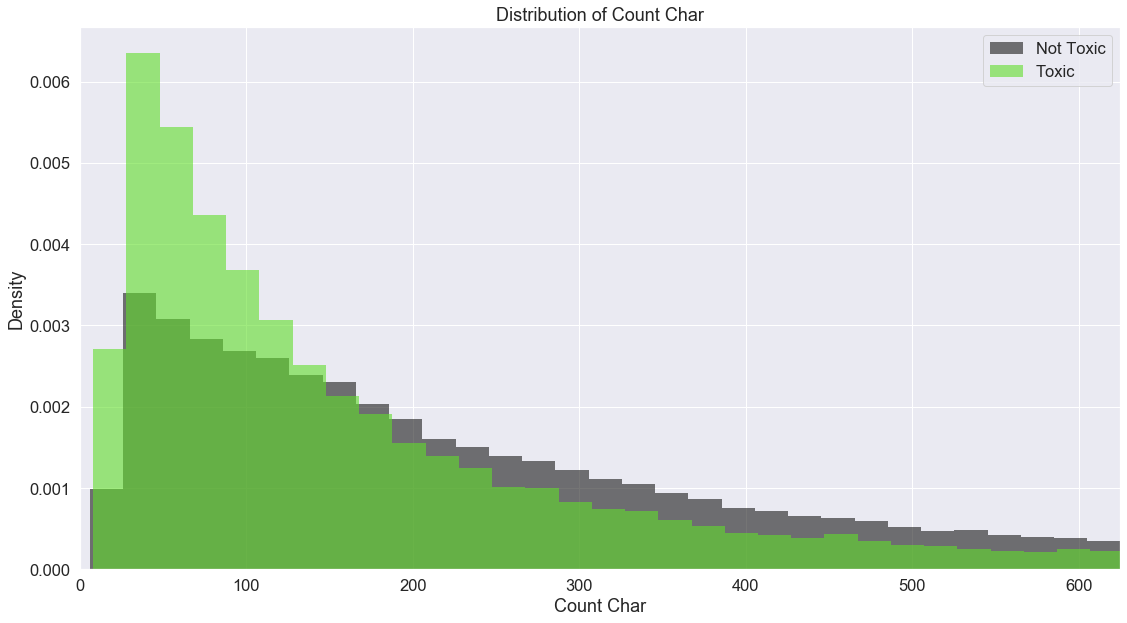

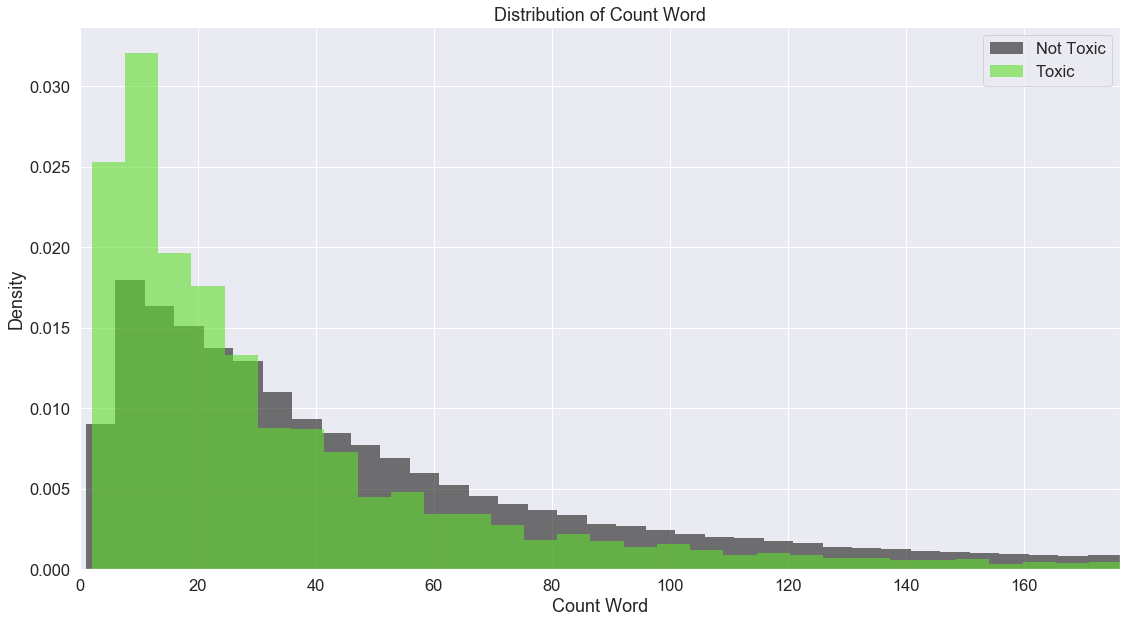

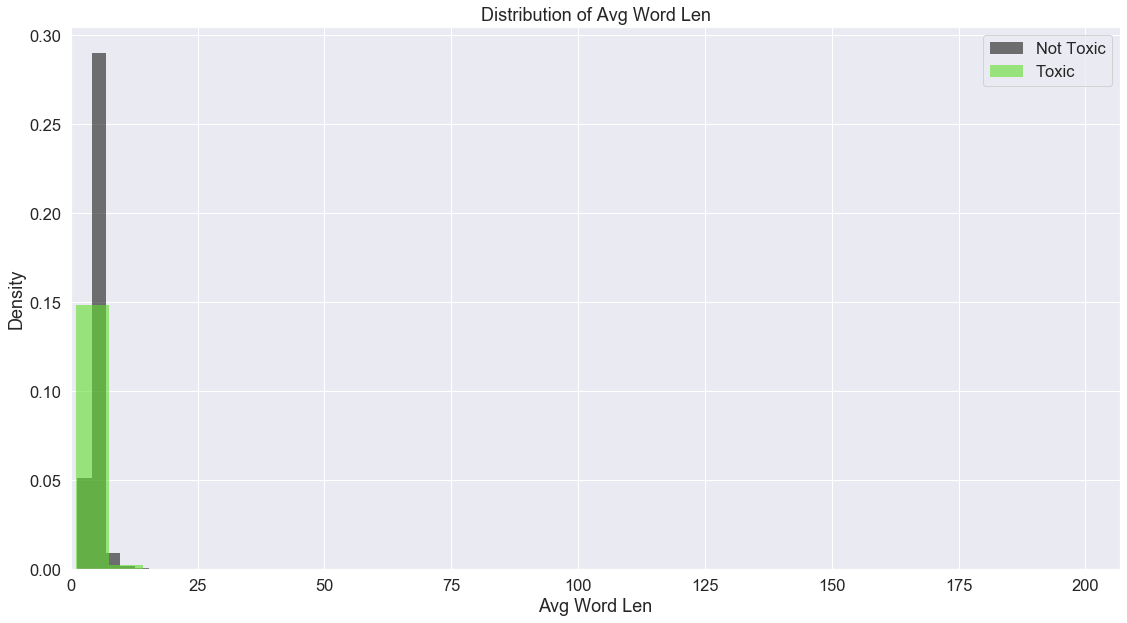

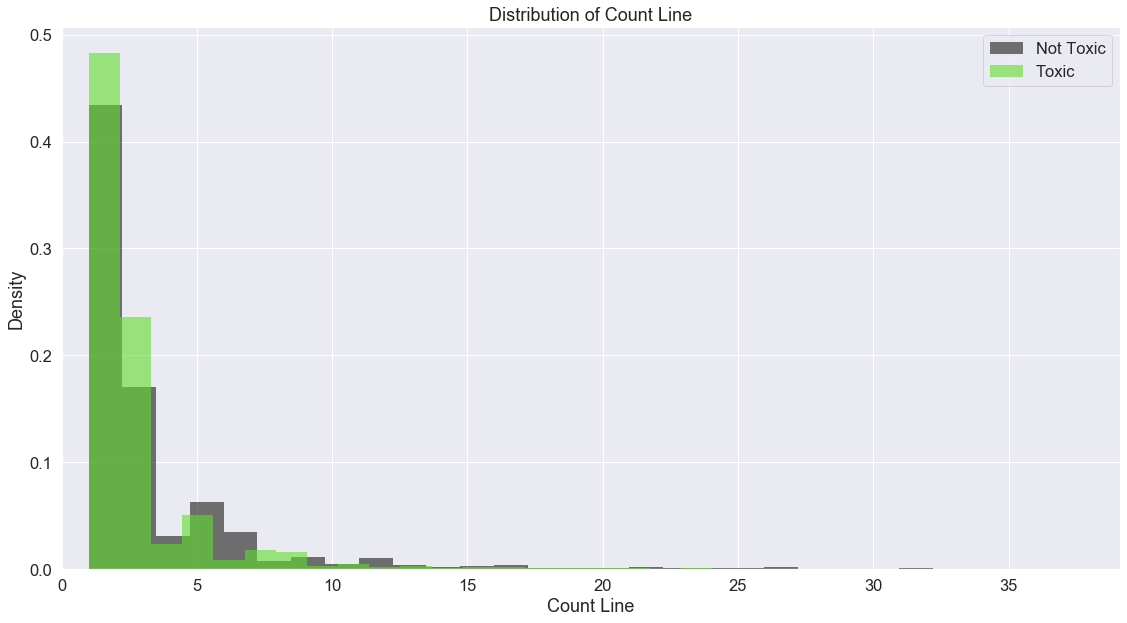

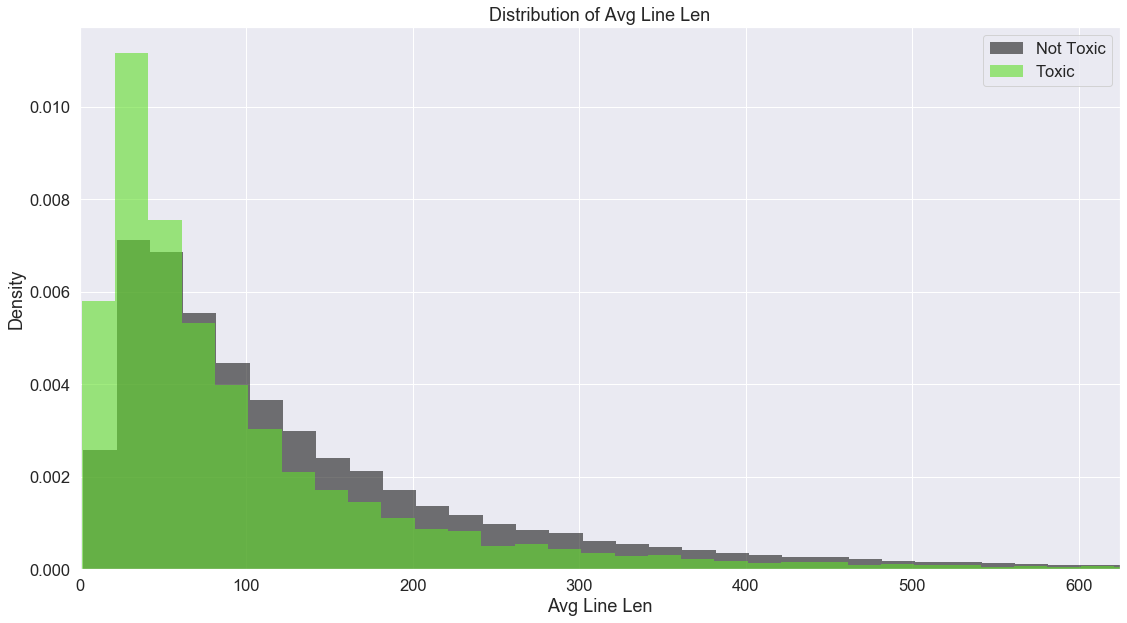

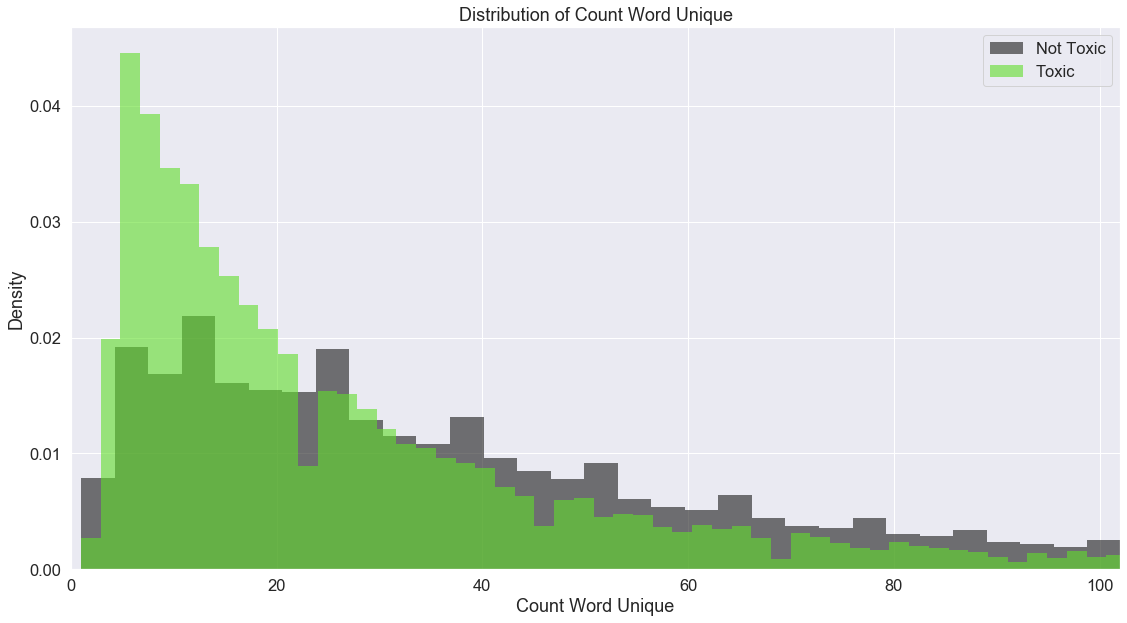

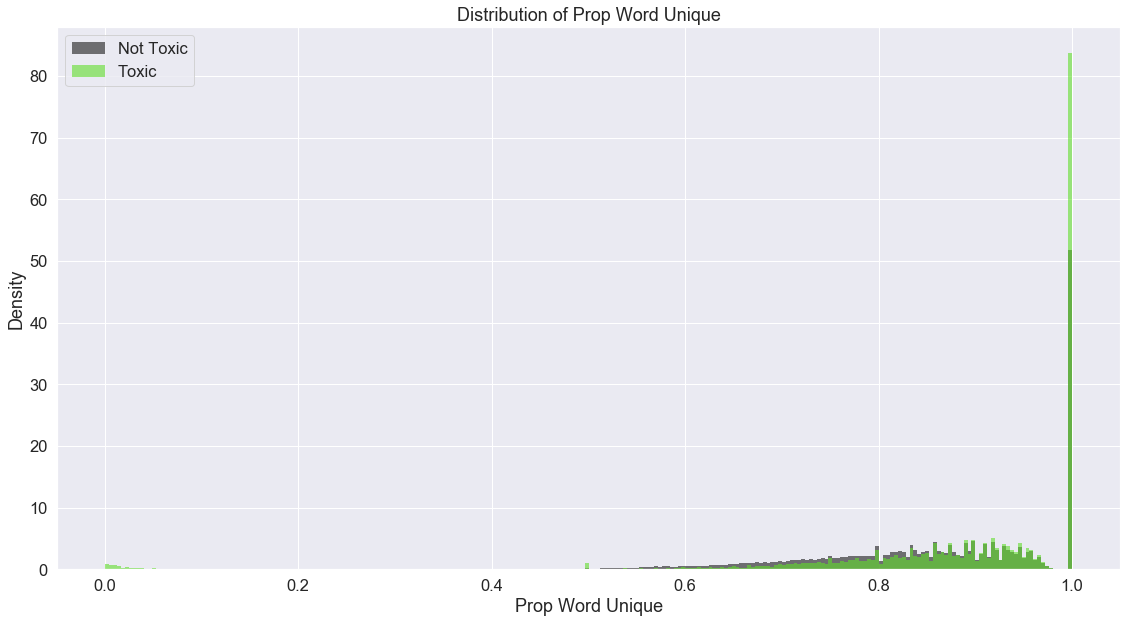

KeyError: 'count_word_alnum'

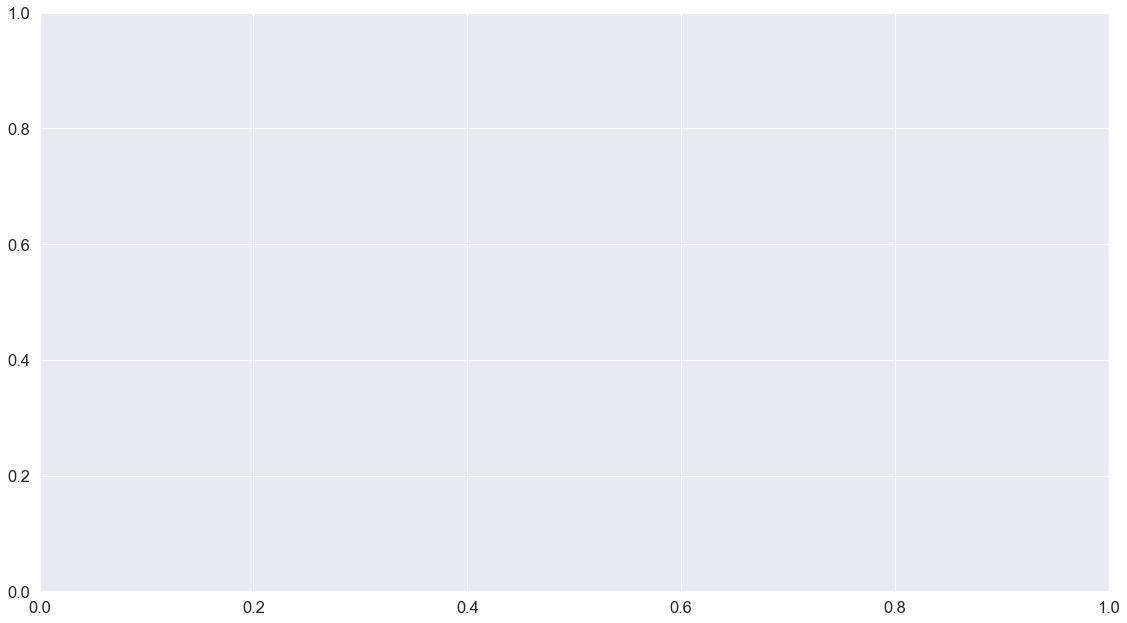

In [16]:
%%time

# variables for looping
col_labels = ['count_char', 'count_word', 'avg_word_len',
       'count_line', 'avg_line_len', 'count_word_unique', 'prop_word_unique',
       'count_word_alnum', 'prop_word_alnum', 'count_word_alpha',
       'prop_word_alpha', 'count_word_ascii', 'prop_word_ascii',
       'count_word_decimal', 'prop_word_decimal', 'count_word_digit',
       'prop_word_digit', 'count_word_lower', 'prop_word_lower',
       'count_word_numeric', 'prop_word_numeric', 'count_word_printable',
       'prop_word_printable', 'count_word_space', 'prop_word_space',
       'count_word_title', 'prop_word_title', 'count_word_upper',
       'prop_word_upper', 'count_char_ascii_lowercase',
       'prop_char_ascii_lowercase', 'count_char_ascii_uppercase',
       'prop_char_ascii_uppercase', 'count_char_digits', 'prop_char_digits',
       'count_char_hexdigits', 'prop_char_hexdigits', 'count_char_octdigits',
       'prop_char_octdigits', 'count_char_punctuation',
       'prop_char_punctuation', 'count_char_printable', 'prop_char_printable',
       'count_char_whitespace', 'prop_char_whitespace']

# targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
#        'insult', 'identity_hate']
targets = ['toxic']

# for labels
# targets_desc = ['toxic', 'severely toxic', 'obscene', 'threatening', 'insulting', 'identity hating']
targets_desc = ['toxic']
# plotting colors
# colors = ['#61de2a', '#61de2a', 'r', 'r', 'r', 'r']
colors = ['#61de2a']

# actual plots
for col in col_labels:
    for target, target_desc, color in zip(targets, targets_desc, colors):
        sns.set(font_scale=1.5)
        fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
        ax = sns.distplot(df_train[df_train[target] == 0][col].values, bins=250, kde=False, hist_kws={'alpha':0.6, 'label':f'Not {target_desc.capitalize()}', 'linewidth':0}, color='k', norm_hist=True)
        ax = sns.distplot(df_train[df_train[target] != 0][col].values, bins=250, kde=False, hist_kws={'alpha':0.6, 'label':f'{target_desc.capitalize()}', 'linewidth':0}, color=color, norm_hist=True)
        if df_train[col].max() > 1:
            ax.set_xlim(0, df_train[col].max()/2**3)
        ax.set_title(f"Distribution of {' '.join(col.split('_')).title()}")
        ax.set_xlabel(f"{' '.join(col.split('_')).title()}")
        ax.set_ylabel('Density')
        ax.legend()
        # plt.savefig('.png')
        plt.show()

# 3. Data Pre-processing

## i. Data Cleaning (low priority)

Passing cleaned text into models did not improve performance. Therefore, cleaning is a low-priority task.

In [138]:
# # cleaning functions

# # # removes html tags from text
# # from bs4 import BeautifulSoup
# # def strip_html(text):
# #     soup = BeautifulSoup(text, "html.parser")
# #     return soup.get_text()


# # Define function for removing special characters
# import re
# def remove_special_characters(text):
#     # remove urls
#     # remove wikipedia <>:<> tags
#     # remove alphanumeric words
#     # remove numeric and punctuation except those specified
#     pattern=r"(@^(https?|ftp)://[^\s/$.?#].[^\s]*$@iS|[A-Z]\S*:[A-Z]\S*|([a-z]+[0-9]+|[0-9]+[a-z]+)[a-z0-9]*|[^a-zA-z\.\'\:\-\?\!\s])"
#     text=re.sub(pattern,'',text)
#     # replace punctuation except apostrophes with spaces
#     pattern=r'[^a-zA-z\'\s]'
#     text=re.sub(pattern,' ',text)
#     return text

# import nltk
# nltk.download('wordnet')
# from nltk.stem.wordnet import WordNetLemmatizer

# # lemmatizing the text
# def simple_lemmatizer(text):
#     wn=WordNetLemmatizer()
#     text= ' '.join([wn.lemmatize(word) for word in text.split()])
#     return text

# # remove apostrophe from contractions
# import re
# def strip_contractions(text):
#     pattern=r'[^a-zA-z\s]'
#     text=re.sub(pattern,'',text)
#     return text

# # cleaning the text
# def denoise_text(text):
# #     text = strip_html(text)
#     text = remove_special_characters(text)
#     text = simple_lemmatizer(text)
#     text = strip_contractions(text)
#     return text

# # applies cleaning functions on review's column
# # train['comment_text'] = train_orig['comment_text'].apply(denoise_text)
# # test['comment_text'] = test_orig['comment_text'].apply(denoise_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\K\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 4. Modeling

## i. Pipelines / Model Building / Hyper-parameter Tuning

##### To Do
Investigate StackingClassifier, VotingClassifier, sklearn.utils.class_weight.compute_sample_weight, sk automl

In [17]:
# for pipelines
from sklearn.pipeline import make_pipeline

# for cross-validating pipeline estimators
from sklearn.model_selection import cross_validate

# vectorizers #tidfvectorizer features produced better models
from sklearn.feature_extraction.text import TfidfVectorizer

# latent topics
# nmf did not improve models

# standardizers
# standardization did not improve models. tfidf values are already between 0, 1 but with unequal variance.

# classifiers
# choose implementations of algorithms that can handle massive sparse matrices
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [18]:
# for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

### Multinomial Naive Bayes

In [52]:
%%time
#MultinomialNB #can tune smoothing alpha
mnb = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=0.4))
scores_mnb = cross_validate(mnb, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(mnb.steps, [[k, v.mean(), v.std()] for k, v in scores_mnb.items()], sep='\n')

# fit best model-to-date
mnb.fit(X_train, y_train)

[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True))]
[['fit_time', 2.058781862258911, 0.1375978976103619], ['score_time', 0.4174705982208252, 0.056554346900536935], ['test_score', 0.9501960252240746, 0.0022743009887992343]]
Wall time: 7.11 s


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True))],
         verbose=False)

In [20]:
##ALREADY TUNED

# %%time
# #MultinomialNB hyperparameter tuning
# random_params_mnb = [{'multinomialnb__alpha': scipy.stats.uniform()}]

# rs_mnb = RandomizedSearchCV(mnb, param_distributions=random_params_mnb, n_iter=20, scoring='roc_auc', n_jobs=-1)

# rs_mnb.fit(X_train, y_train)
# print(rs_mnb.best_score_)
# print(rs_mnb.best_params_)

### Logistic Regression (Elastic net)

In [53]:
%%time
#Logistic Ridge Regression #needs tuning. #worse performance when data is standardized
lr = make_pipeline(TfidfVectorizer(), SGDClassifier(loss='log', 
                                                    penalty='elasticnet', 
                                                    alpha=0.00001, 
                                                    l1_ratio=0.95, 
                                                    random_state=1959, early_stopping=True))
scores_lr = cross_validate(lr, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(lr.steps, [[k, v.mean(), v.std()] for k, v in scores_lr.items()], sep='\n')

# fit best model-to-date
lr.fit(X_train, y_train)

[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('sgdclassifier', SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.95, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=1959, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False))]
[['fit_time', 2.3497939586639403, 

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=True, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.95,
                               learning_rate='optimal', loss='log',
               

In [22]:
# # ALREADY TUNED

# %%time
# #Logistic Regression hyperparameter tuning
# random_params_lr = [{'sgdclassifier__alpha':np.logspace(-4, 4), 
#                      'sgdclassifier__l1_ratio':scipy.stats.beta(a=0.766, b=0.277)}]

# rs_lr = RandomizedSearchCV(lr, param_distributions=random_params_lr, n_iter=50, scoring='roc_auc', n_jobs=-1)

# rs_lr.fit(X_train, y_train)
# print(rs_lr.best_score_)
# print(rs_lr.best_params_)

### SVC with Linear Kernel

In [54]:
%%time
#SVM with Linear Kernel #worse performance when data is standardized
svm = make_pipeline(TfidfVectorizer(), SGDClassifier(alpha=0.0001, random_state=2000, early_stopping=True))
scores_svm = cross_validate(svm, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(svm.steps, [[k, v.mean(), v.std()] for k, v in scores_svm.items()], sep='\n')

# fit best model-to-date
svm.fit(X_train, y_train)

[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('sgdclassifier', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=2000, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False))]
[['fit_time', 2.2729078769683837, 0.115

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=True, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='op

In [24]:
# # ALREADY TUNED

# %%time
# #SVM with Linear Kernel hyperparameter tuning
# random_params_svm = [{'sgdclassifier__alpha':np.logspace(-4, 0)}]

# rs_svm = RandomizedSearchCV(svm, param_distributions=random_params_svm, n_iter=60, scoring='roc_auc', n_jobs=-1)

# rs_svm.fit(X_train, y_train)
# print(rs_svm.best_score_)
# print(rs_svm.best_params_)

### Gradient-boosted Classifier

In [49]:
%%time
#LGBMClassifier #needs tuning
lgbm = make_pipeline(TfidfVectorizer(), LGBMClassifier(boosting_type='dart', random_state=2015, n_jobs=-1))
lgbm = make_pipeline(TfidfVectorizer(), LGBMClassifier(boosting_type='gbdt', 
                                                       learning_rate=0.01, 
                                                       n_estimators=1000,
                                                       random_state=2015, n_jobs=-1))
scores_lgbm = cross_validate(lgbm, X_train, y_train, scoring='roc_auc', n_jobs=-1)

print(lgbm.steps, [[k, v.mean(), v.std()] for k, v in scores_lgbm.items()], sep='\n')

# fit best model-to-date
lgbm.fit(X_train, y_train)

[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('lgbmclassifier', LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2015, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0))]


In [50]:
# %%time
# # LGBMClassifier hyperparameter tuning #choose carefully to minimize running time!!

# random_params_lgbm = [{'lgbmclassifier__num_leaves':scipy.stats.randint(10, 120),
#                        'lgbmclassifier__max_depth':scipy.stats.randint(5, 30),
#                        'lgbmclassifier__learning_rate':np.logspace(-4, -1),
#                        'lgbmclassifier__n_estimators':np.logspace(2, 4).astype(int),
#                        'lgbmclassifier__min_child_samples':np.logspace(1,3).astype(int),
#                        'lgbmclassifier__max_bin':np.arange(2,255+1)
#                       }]

# rs_lgbm = RandomizedSearchCV(lgbm, param_distributions=random_params_lgbm, n_iter=1, scoring='roc_auc', n_jobs=-1)

# rs_lgbm.fit(X_train, y_train)
# print(rs_lgbm.best_score_)
# print(rs_lgbm.best_params_)

Wall time: 0 ns


### Random Forest Implementations

#### scikit-learn

In [56]:
%%time
#RandomForestClassifier #relatively slow fitting
sk_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_jobs=-1, random_state=2007))
scores_sk_rf = cross_validate(sk_rf, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(sk_rf.steps, [[k, v.mean(), v.std()] for k, v in scores_sk_rf.items()], sep='\n')

# fit best model-to-date
sk_rf.fit(X_train, y_train)

[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

#### LightGBM

In [30]:
%%time
#LGBM Random Forest #needs tuning
lgbm_rf = make_pipeline(TfidfVectorizer(), LGBMClassifier(boosting_type="rf",
                         num_leaves=25,
                         max_depth=21,
                         min_child_samples=1,
                         n_estimators=954,
                         subsample=.632, # Standard RF bagging fraction
                         subsample_freq=1,
                         colsample_bytree=.005,
                         random_state=2015, n_jobs=-1))
scores_lgbm_rf = cross_validate(lgbm_rf, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(lgbm_rf.steps, [[k, v.mean(), v.std()] for k, v in scores_lgbm_rf.items()], sep='\n')



[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('lgbmclassifier', LGBMClassifier(boosting_type='rf', class_weight=None, colsample_bytree=0.005,
               importance_type='split', learning_rate=0.1, max_depth=21,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=954, n_jobs=-1, num_leaves=25, objective=None,
               random_state=2015, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.632, subsample_for_bin=200000, subsample_freq=1))]
[

In [31]:
%%time
#LGBMClassifier hyperparameter tuning
random_params_lgbm_rf = [{'lgbmclassifier__num_leaves':np.logspace(1,2.5).astype(int),
                       'lgbmclassifier__max_depth':scipy.stats.randint(10, 30),
                       'lgbmclassifier__n_estimators':np.logspace(2,3).astype(int),
                       'lgbmclassifier__min_child_samples':np.logspace(0,3.75).astype(int),
                      }]

rs_lgbm_rf = RandomizedSearchCV(lgbm_rf, param_distributions=random_params_lgbm_rf, n_iter=1, scoring='roc_auc', n_jobs=-1)

rs_lgbm_rf.fit(X_train, y_train)
print(rs_lgbm_rf.best_score_)
print(rs_lgbm_rf.best_params_)

0.7671357238731413
{'lgbmclassifier__max_depth': 28, 'lgbmclassifier__min_child_samples': 399, 'lgbmclassifier__n_estimators': 625, 'lgbmclassifier__num_leaves': 30}
Wall time: 10.1 s


### Ensemble Models (experimentation)

A Decision Tree trained on predictions from my 5 best-in-class models performed worse than any individual model.  
A Random Forest model-of-models exhibited similar poor performance.  
Building a model-of-models is a good avenue for future exploration.

In [57]:
from sklearn.metrics import plot_roc_curve

In [113]:
%%time
# soft classification is better than hard classification when building a model-of-models ensemble
lr_pred_prob_tr = lr.predict_proba(X_train)[:, 1]
lgbm_pred_prob_tr = lgbm.predict_proba(X_train)[:, 1]
svm_pred_prob_tr = svm.predict(X_train)
mnb_pred_prob_tr = mnb.predict_proba(X_train)[:, 1]
sk_rf_pred_prob_tr = sk_rf.predict_proba(X_train)[:, 1]

lr_pred_prob_te = lr.predict_proba(X_test)[:, 1]
lgbm_pred_prob_te = lgbm.predict_proba(X_test)[:, 1]
svm_pred_prob_te = svm.predict(X_test)
mnb_pred_prob_te = mnb.predict_proba(X_test)[:, 1]
sk_rf_pred_prob_te = sk_rf.predict_proba(X_test)[:, 1]

# Hard classification results in information loss and ensembled model performs worse
# lr_pred_prob_tr = lr.predict(X_train)
# lgbm_pred_prob_tr = lgbm.predict(X_train)
# svm_pred_prob_tr = svm.predict(X_train)
# mnb_pred_prob_tr = mnb.predict(X_train)
# sk_rf_pred_prob_tr = sk_rf.predict(X_train)

# lr_pred_prob_te = lr.predict(X_test)
# lgbm_pred_prob_te = lgbm.predict(X_test)
# svm_pred_prob_te = svm.predict(X_test)
# mnb_pred_prob_te = mnb.predict(X_test)
# sk_rf_pred_prob_te = sk_rf.predict(X_test)

X_train_ensemble = np.stack((lr_pred_prob_tr, lgbm_pred_prob_tr, svm_pred_prob_tr, mnb_pred_prob_tr, sk_rf_pred_prob_tr)).T
X_test_ensemble = np.stack((lr_pred_prob_te, lgbm_pred_prob_te, svm_pred_prob_te, mnb_pred_prob_te, sk_rf_pred_prob_te)).T

Wall time: 1min 11s


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_ensemble = DecisionTreeClassifier()
sk_rf_ensemble = RandomForestClassifier()

In [114]:
dt_ensemble.fit(X_train_ensemble, y_train)
sk_rf_ensemble.fit(X_train_ensemble, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

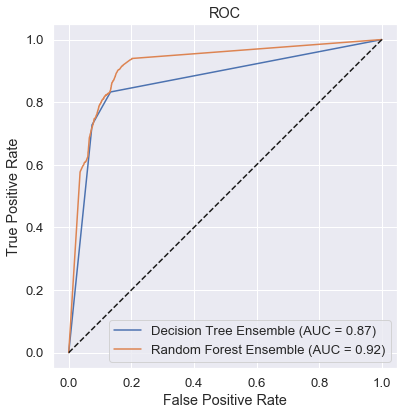

In [132]:
# Performance of model-of-model ensembles
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plot_roc_curve(dt_ensemble, X_test_ensemble, y_test, ax=ax, name='Decision Tree Ensemble')
plot_roc_curve(sk_rf_ensemble, X_test_ensemble, y_test, ax=ax, name='Random Forest Ensemble')
ax.plot([0, 1], [0, 1], 'k--')
ax.set(aspect='equal', title='ROC')
plt.show()

## ii. Model Selection

Based on 5-fold CV AUC scores, the Elastic net Logistic Regression is my final model.  
Plotting ROC curves using my holdout test set provides an estimate of model performance.  
Cross-validated scores are misleading because models are overfit to the training data.

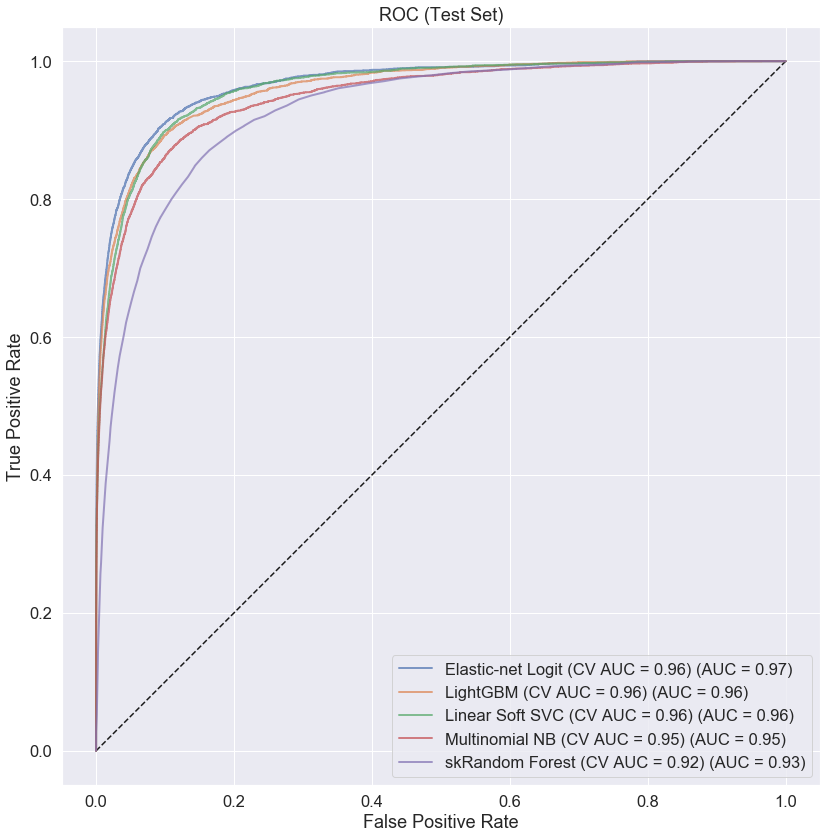

Wall time: 1min 3s


In [130]:
%%time
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(16, 12), tight_layout=True)
ax.plot([0, 1], [0, 1], 'k--')
plot_roc_curve(lr, X_test, y_test, ax=ax, name='Elastic-net Logit (CV AUC = 0.96)', lw=2, alpha=0.7)
plot_roc_curve(lgbm, X_test, y_test, ax=ax, name='LightGBM (CV AUC = 0.96)', lw=2, alpha=0.7)
plot_roc_curve(svm, X_test, y_test, ax=ax, name='Linear Soft SVC (CV AUC = 0.96)', lw=2, alpha=0.7)
plot_roc_curve(mnb, X_test, y_test, ax=ax, name='Multinomial NB (CV AUC = 0.95)', lw=2, alpha=0.7)
plot_roc_curve(sk_rf, X_test, y_test, ax=ax, name='skRandom Forest (CV AUC = 0.92)', lw=2, alpha=0.7)
ax.set(aspect='equal', title='ROC (Test Set)')
plt
# plt.savefig('.png')
plt.show()

# 5. Final Model: Elastic-net Logit

Emulating my model's competition performance.  
Goal of > 0.98 AUC was not achieved.  
Back to the drawing board...

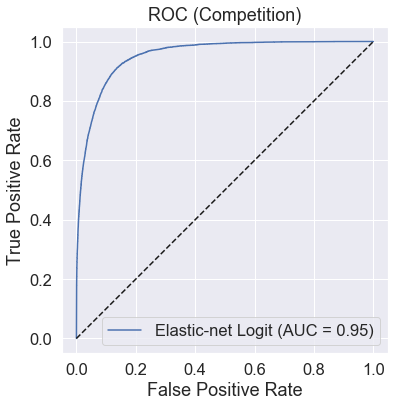

In [131]:
X_test_private = df_test_clean['comment_text']
y_test_private = df_test_clean['toxic']

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plot_roc_curve(lr, X_test_private, y_test_private, ax=ax, name='Elastic-net Logit')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_title('ROC (Competition)')
ax.set_aspect('equal')
plt.show()

# 6. More Data

Modeling process must be repeated for 5 comment subtypes.

In [134]:
# kaggle competition data
# jigsaw_unintended_bias_tr = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/train.csv')

# jigsaw_unintended_bias_te = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test.csv')

# jigsaw_unintended_bias_te_private = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_private_expanded.csv')

# jigsaw_unintended_bias_te_public = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_public_expanded.csv')

# wikimedia data corresponding to the data analyzed in this notebook
# attack_annotated_comments = pd.read_csv('data/4054689/attack_annotated_comments.tsv', sep='\t')

# attack_annotations = pd.read_csv('data/4054689/attack_annotations.tsv', sep='\t')

# attack_worker_demographics = pd.read_csv('data/4054689/attack_worker_demographics.tsv', sep='\t')